# Solution of 5.9.2, Map of Science 
### Read the file `pubmed_results.txt`, and extract all the US ZIP codes.

First, import the modules we'll need.

In [1]:
import re
import csv

Now read the whole file, and store it into a string.

In [2]:
with open('../data/MapOfScience/pubmed_results.txt') as f:
    my_text = f.read()

In [3]:
len(my_text)

4941404

Note that the zipcode could be broken over two lines, as in line 43 of `pubmed_results.txt`

```
AD  - Biological and Biomedical Sciences Program, Harvard Medical School, Boston, MA
      02115, USA. Department of Genetics, Harvard Medical School, Boston, MA 02115,
      USA.
```

To avoid problems, replace each newline followed by 6 spaces with a single space.

In [4]:
my_text = re.sub(r'\n\s{6}', ' ', my_text)

We should now have every entry in a single line. Let's look at part of an entry:

In [5]:
print(my_text[:2000])


PMID- 26721686
OWN - NLM
STAT- Publisher
DA  - 20160101
LR  - 20160102
IS  - 1095-9203 (Electronic)
IS  - 0036-8075 (Linking)
DP  - 2015 Dec 31
TI  - In vivo gene editing in dystrophic mouse muscle and muscle stem cells.
LID - aad5177 [pii]
AB  - Frame-disrupting mutations in the DMD gene, encoding dystrophin, compromise myofiber integrity and drive muscle deterioration in Duchenne muscular dystrophy  (DMD). Removing one or more exons from the mutated transcript can produce an in-frame mRNA and a truncated, but still functional, protein. In this study, we develop and test a direct gene-editing approach to induce exon deletion and recover dystrophin expression in the mdx mouse model of DMD. Delivery by adeno-associated virus (AAV) of clustered regularly interspaced short palindromic repeats (CRISPR)-Cas9 endonucleases coupled with paired guide RNAs flanking the mutated Dmd exon23 resulted in excision of intervening DNA and restored Dystrophin reading frame in myofibers, cardiomyocytes,

Now write a regular expression that creates a list of zipcodes:

In [6]:
zipcodes = re.findall(r'[A-Z]{2}\s(\d{5}), USA', my_text)

The anatomy of the regular expression:
```
[A-Z]{2}  -> two capital letters (for the state)
\s -> followed by a space
\d{5} -> followed by exactly 5 digits
, USA -> follwed by the string ", USA"
```
Note that we use a group `(\d{5})` to capture exclusively the zipcode proper.

In [7]:
len(zipcodes)

5198

In [8]:
zipcodes[:10]

['02138',
 '02115',
 '02138',
 '02138',
 '02138',
 '02115',
 '02115',
 '02115',
 '02142',
 '02139']

Extract the unique zipcodes 

In [9]:
unique_zipcodes = list(set(zipcodes))

In [10]:
unique_zipcodes.sort()

In [11]:
unique_zipcodes[:10]

['00680',
 '01002',
 '01003',
 '01605',
 '01609',
 '01610',
 '01655',
 '01772',
 '01854',
 '01887']

In [12]:
len(unique_zipcodes)

462

Now create a dictionary with the latitude and longitude for each zipcode:

In [13]:
zip_coordinates = {}
with open('../data/MapOfScience/zipcodes_coordinates.txt') as f:
    csvr = csv.DictReader(f)
    for row in csvr:
        zip_coordinates[row['ZIP']] = [float(row['LAT']), 
                                       float(row['LNG'])]

### Create the lists `zip_code`, containing the ZIP codes, `zip_long`, `zip_lat`, and `zip_count`, containing the unique ZIP codes, their longitude, latitude, and count (number of occurrences in Science), respectively.

In [14]:
zip_code = []
zip_long = []
zip_lat = []
zip_count = []

Populate the lists:

In [15]:
for z in unique_zipcodes:
    # if we can find the coordinates
    if z in zip_coordinates.keys():
        zip_code.append(z)
        zip_lat.append(zip_coordinates[z][0])
        zip_long.append(zip_coordinates[z][1])
        zip_count.append(zipcodes.count(z))

### Plot the results using the following code:

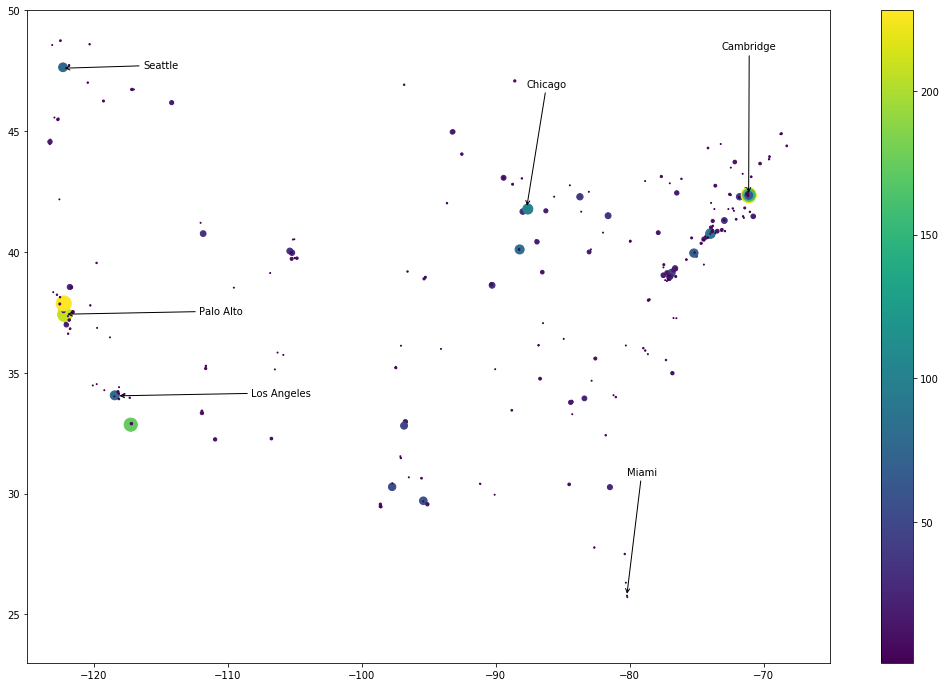

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(zip_long, zip_lat, s = zip_count, c= zip_count)
plt.colorbar()
# only continental us without Alaska
plt.xlim(-125,-65)
plt.ylim(23, 50)
# add a few cities for reference (optional)
ard = dict(arrowstyle="->")
plt.annotate('Los Angeles', xy = (-118.25, 34.05), 
               xytext = (-108.25, 34.05), arrowprops = ard)
plt.annotate('Palo Alto', xy = (-122.1381, 37.4292), 
               xytext = (-112.1381, 37.4292), arrowprops= ard)
plt.annotate('Cambridge', xy = (-71.1106, 42.3736), 
               xytext = (-73.1106, 48.3736), arrowprops= ard)
plt.annotate('Chicago', xy = (-87.6847, 41.8369), 
               xytext = (-87.6847, 46.8369), arrowprops= ard)
plt.annotate('Seattle', xy = (-122.33, 47.61), 
               xytext = (-116.33, 47.61), arrowprops= ard)
plt.annotate('Miami', xy = (-80.21, 25.7753), 
               xytext = (-80.21, 30.7753), arrowprops= ard)
params = plt.gcf()
plSize = params.get_size_inches()
params.set_size_inches( (plSize[0] * 3, plSize[1] * 3) )
plt.show()

In [17]:
zip_code.index('60637')

215

In [18]:
zip_count[215]

101